# Task 1 : CSV Import Mastery
- **Objektive:** Use the code template for importing data from a CSV file into TinyFlux
- **Instructions:**
    1. Take the provided CSV import template and import a new CSV file 
    2. Modify the template to add a new field and tag (e.g., add a "device_type"tag)
    3. Vertify that the data has been correctly inserted by querying the first 10 records.

- **Goal:** Understand how to manipulate CSV data and map fields and tags when importing into TinyFlux.

In [1]:
# Libraries
import pandas as pd
import csv
from tinyflux import TinyFlux, Point, FieldQuery, TagQuery, TimeQuery
from datetime import datetime, timezone, timedelta

# Settings
import warnings
warnings.filterwarnings("ignore")

# Abkürzungen für Query-Typen
time = TimeQuery()
tags = TagQuery()
field = FieldQuery()

In [2]:
# Define the function to transform the list of Point objects into a DataFrame
def points_to_dataframe(points_list):
    data = []
    
    # Extract the relevant information
    for point in points_list:
        data.append({
            "time": point.time,  # Access time attribute
            "sensor_id": point.tags['sensor_id'],  # Access sender_id from tags dictionary
            "temperature": point.fields['temperature'],  # Access receiver_id from tags dictionary
            "status": point.tags['status']  # Access status from tags dictionary
        })

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Convert time to datetime
    df['time'] = pd.to_datetime(df['time'])

    return df

In [3]:
# Erstellung der Tinyflux-Datenbank (wird bereitgestellt)
db = TinyFlux("temperatures2.db")

In [4]:
# CSV-Datei in Dataframe laden
df = pd.read_csv('example_data/synthetic_temperature_readings.csv')

# Das Format des Zeitstempels in Pandas setzen
df['time']= pd.to_datetime(df['time'], format='mixed')

# Task 2: Manual Data Entry Practice
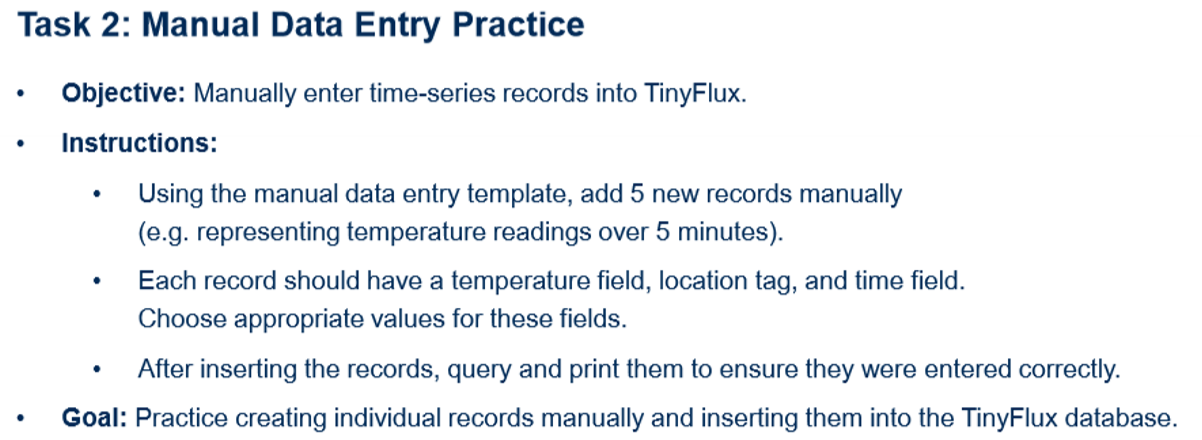

# Task3: Query by Time and Analyze

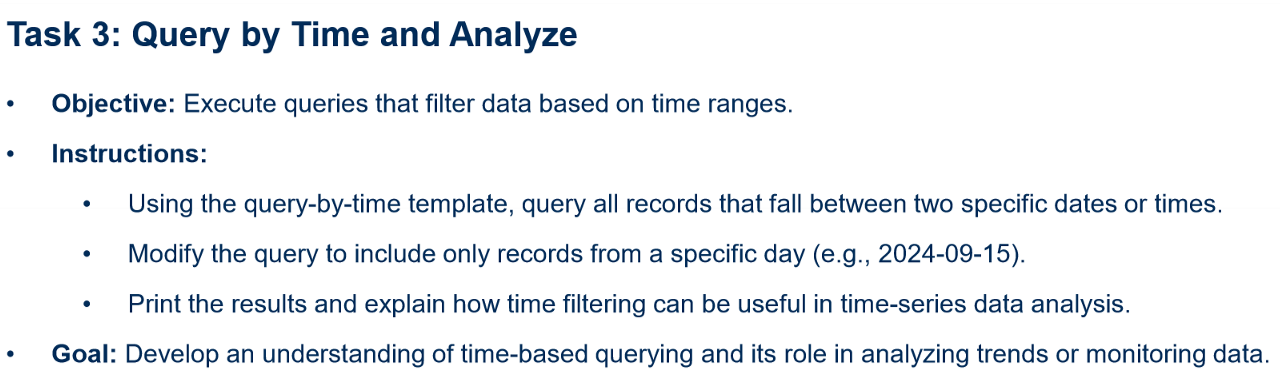

# Task 4: